In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

##This is code was used to find the missing values.  It is not part of the main program

#### I used linear regression to predict the 3 missing values in the dataset

In [3]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(input_data, carbo)
print(regr2.score(input_data_test, carbo_test))
regr2.predict([100, 3, 0, 80, 1, 21, 0 , 0, 2 ,1, 1.00 ])

In [305]:
cerealmis = cereal[cereal.potass == -1]
cereal = cereal[cereal >= 0]
cerealmiscol = cerealmis[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
cereal = cereal.dropna()
print(cerealmis)

                      name mfr type  calories  protein  fat  sodium  fiber  \
4           Almond_Delight   R    C       110        2    2     200      1   
20  Cream_of_Wheat_(Quick)   N    H       100        3    0      80      1   

    carbo  sugars  potass  vitamins  shelf  weight  cups  
4      14       8      -1        25      3       1  0.75  
20     21       0      -1         0      2       1  1.00  


In [315]:
print("carbo", "sugars", "potass")
cereal_train, cereal_test = train_test_split(cereal)
input_data = cereal_train[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'shelf', 'weight', 'cups']]
input_data_test = cereal_test[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'vitamins', 'shelf', 'weight', 'cups']]
carbo = cereal_train[['potass']]
carbo_test = cereal_test[["potass"]]
input_data.head()

carbo sugars potass


,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,shelf,weight,cups
49,140,3,2,220,3,21,7,25,3,1.33,0.67
53,100,3,0,320,1,20,3,100,3,1.00,1.00
65,90,3,0,0,3,20,0,0,1,1.00,0.67
63,80,2,0,0,3,16,0,0,1,0.83,1.00
48,120,2,1,190,0,15,9,25,2,1.00,0.67


##Main Program Starts

In [3]:
%matplotlib inline

### The goal of this notebook is to adjust the data to be comparable and then use kmeans clustering to find different groups and glean truth from the data

In [4]:
cereal = pd.read_csv("cereals.csv")
cereal.loc[57, 'carbo'] = 12.04
cereal.loc[57, 'sugars'] = 15.94
cereal.loc[4, 'potass'] = 76.36
cereal.loc[20, 'potass'] = 65.44
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280.00,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135.00,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320.00,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330.00,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,76.36,25,3,1,0.75


In [5]:
names = cereal.pop('name')
mfr = cereal.pop('mfr')
protein = cereal.pop('type')

In [6]:
def adjust(data):
    for index, row in data.iterrows():
        dvideby = 1 / data.cups[index]
        data[index:] = data[index:] * dvideby
    return data
adjust(cereal).head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,9.090909,3.030303,1
1,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3.000000,1.000000,1
2,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,9.090909,3.030303,1
3,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1
4,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,101.813333,33.333333,4.000000,1.333333,1


In [7]:
cereal.head()
pca = PCA(n_components=2)
pca.fit(cereal)
reduced_cereal = pca.transform(cereal)

####The data below was not adjusted for Cups

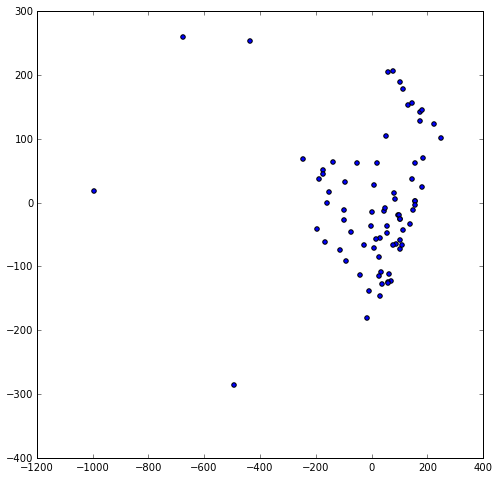

In [8]:
plt.figure(figsize = (8,8))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1])

In [9]:
kmeans = KMeans(3)
kmeans.fit(reduced_cereal)
cereal_cluster = kmeans.predict(reduced_cereal)

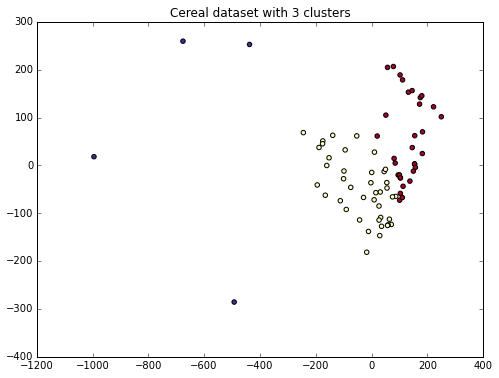

In [10]:

plt.figure(figsize=(8, 6))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1], c=cereal_cluster, cmap="RdYlBu")
plt.title("Cereal dataset with 3 clusters")
plt.show()

In [11]:
cereal_cluster_list = cereal_cluster.tolist()
names_list = list(names)
zipped = zip(cereal_cluster_list, names_list)

In [12]:
zipped1 = list(zipped)

In [13]:
pd.DataFrame(sorted(zipped1), columns=["Cluster", "Name"]).head()

,Cluster,Name
0,0,100%_Natural_Bran
1,0,Apple_Jacks
2,0,Cocoa_Puffs
3,0,Corn_Pops
4,0,Count_Chocula


###Below is data when the data is adjusted so each cereal is one cup
####This means that if the cereal had a value of 1 for potass at half a cup it has a value of 2 for a full cup

##The information below is more accurate then above because we have adjusted the data to take into account the cereals serving side and made the comparision for 1 cup each

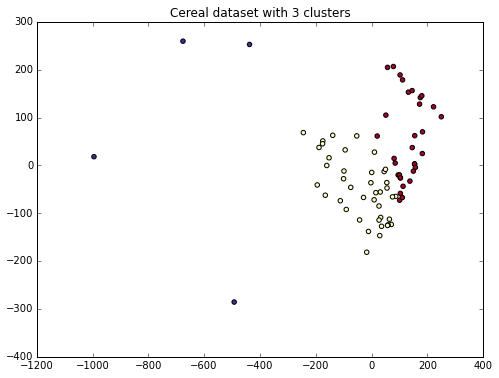

In [14]:
kmeans = KMeans(3)
kmeans.fit(reduced_cereal)
cereal_cluster = kmeans.predict(reduced_cereal)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1], c=cereal_cluster, cmap="RdYlBu")
plt.title("Cereal dataset with 3 clusters")
plt.show()

In [15]:
cereal_cluster_list = cereal_cluster.tolist()
names_list = list(names)
zipped = zip(cereal_cluster_list, names_list)

In [16]:
zipped1 = list(zipped)

In [17]:
sortedcereal = pd.DataFrame(sorted(zipped1), columns=["Cluster", "Name"])

In [29]:
cereal["Name"] = names
cereal
newcereal = pd.DataFrame.merge(cereal, sortedcereal)
newcereal = newcereal.sort(['Cluster'], ascending=[True])



####It's time to analyze!

In [19]:
cluster0 = newcereal[newcereal.Cluster == 0]
cluster1 = newcereal[newcereal.Cluster == 1]
cluster2 = newcereal[newcereal.Cluster == 2]

In [20]:
cluster0_mean = cluster0.mean()
cluster1_mean = cluster1.mean()
cluster2_mean = cluster2.mean()

####Needed to do a bit of research
http://www.precisionnutrition.com/all-about-breakfast-cereals

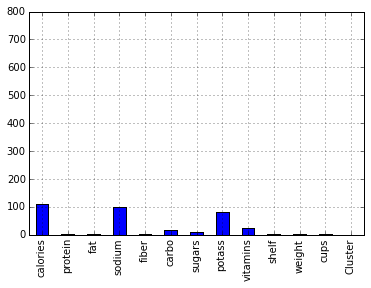

In [21]:
plt.figure()
plt.ylim(ymin=0, ymax=800)
cluster0_mean.plot(kind="bar")

####Midrange in regard to nutrients
#### These seem to contain oven puffed oat cereals

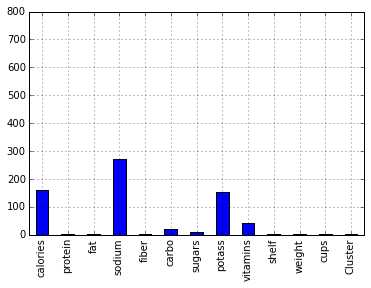

In [22]:
plt.figure()
plt.ylim(ymin=0, ymax=800)
cluster1_mean.plot(kind="bar")

####Most Cereals seem to fall into cluster 1, these include cereals considered to be sweet
####This group consists mostly of flaked cereals

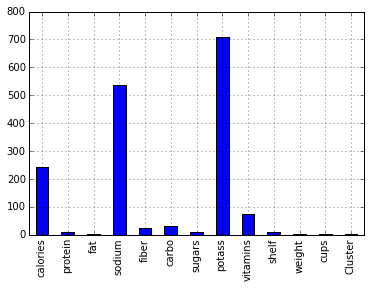

In [27]:
plt.figure()
plt.ylim(ymin=0, ymax=800)
cluster2_mean.plot(kind="bar")

#### This seems to be cereals containing large amounts of Bran